# 19.01.29-19.01.30 단어 언급량 비교와 검정

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
#fontprop = fm.FontProperties(fname=path, size=20)


pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



In [46]:
df1 = pd.read_csv('M_0129.csv')
df2 = pd.read_csv('M_0130.csv')

print(df1.head(10))
print(df2.head(10))
print(list(df2.word)[:10])


  word  freq     zscore
0   혜원  9149  33.520651
1   사람  7585  27.734955
2   생각  4078  14.761530
3   조카  3541  12.775009
4   아들  3294  11.861284
5   창성  3276  11.794696
6  민주당  3126  11.239802
7   문제  3030  10.884670
8   명의  2824  10.122616
9   수정  2658   9.508533
  word  freq     zscore
0  김경수  1543  37.622783
1   판결  1191  28.980619
2   판사  1038  25.224224
3   증거   871  21.124106
4   사람   780  18.889911
5   댓글   734  17.760537
6  민주당   644  15.550893
7   구속   569  13.709523
8   생각   561  13.513110
9   같은   551  13.267594
['김경수', '판결', '판사', '증거', '사람', '댓글', '민주당', '구속', '생각', '같은']


In [47]:
## join
df3 = df1.set_index('word')
df4 = df2.set_index('word')
print(df3.head())


      freq     zscore
word                 
혜원    9149  33.520651
사람    7585  27.734955
생각    4078  14.761530
조카    3541  12.775009
아들    3294  11.861284


In [48]:
# 29,30일 모두 언급된 단어 정보를 담은 새로운 데이터프레임 생성
joined_df = df3.join(df4, how='inner', lsuffix='_left', rsuffix='_right')
print(joined_df.head(10))


      freq_left  zscore_left  freq_right  zscore_right
word                                                  
혜원         9149    33.520651          57      1.139102
사람         7585    27.734955         780     18.889911
생각         4078    14.761530         561     13.513110
조카         3541    12.775009           2     -0.211236
아들         3294    11.861284          65      1.335515
민주당        3126    11.239802         644     15.550893
문제         3030    10.884670         377      8.995615
명의         2824    10.122616           4     -0.162132
수정         2658     9.508533         338      8.038103
리플         2590     9.256981         329      7.817138


In [49]:
# 공통 언급된 단어들과 zscore, 차이를 담은  gap 칼럼 생성
joined_df ['gap'] = abs(joined_df ['zscore_right']) - abs(joined_df ['zscore_left'])

print(joined_df.head())

      freq_left  zscore_left  freq_right  zscore_right        gap
word                                                             
혜원         9149    33.520651          57      1.139102 -32.381549
사람         7585    27.734955         780     18.889911  -8.845045
생각         4078    14.761530         561     13.513110  -1.248421
조카         3541    12.775009           2     -0.211236 -12.563774
아들         3294    11.861284          65      1.335515 -10.525769


In [50]:
# zscore 가장 차이 많이 나는 top20 
top20 = joined_df.sort_values(by='gap', ascending=False).head(20)
print(top20)


print('idx', list(top20.index))


      freq_left  zscore_left  freq_right  zscore_right        gap
word                                                             
김경수         203     0.426765        1543     37.622783  37.196017
판결          102     0.053137        1191     28.980619  28.927482
판사          114     0.097528        1038     25.224224  25.126696
증거          293     0.759702         871     21.124106  20.364404
댓글         1137     3.881906         734     17.760537  13.878631
구속           84    -0.013451         569     13.709523  13.696072
유죄           74    -0.050443         507     12.187323  12.136880
양승태          90     0.008745         488     11.720843  11.712098
재판          269     0.670919         442     10.591469   9.920550
어요            8    -0.294597         389      9.290234   8.995637
기사          416     1.214715         421     10.075886   8.861170
이나          100     0.045738         366      8.725547   8.679809
지사          153     0.241801         356      8.480031   8.238231
무죄        

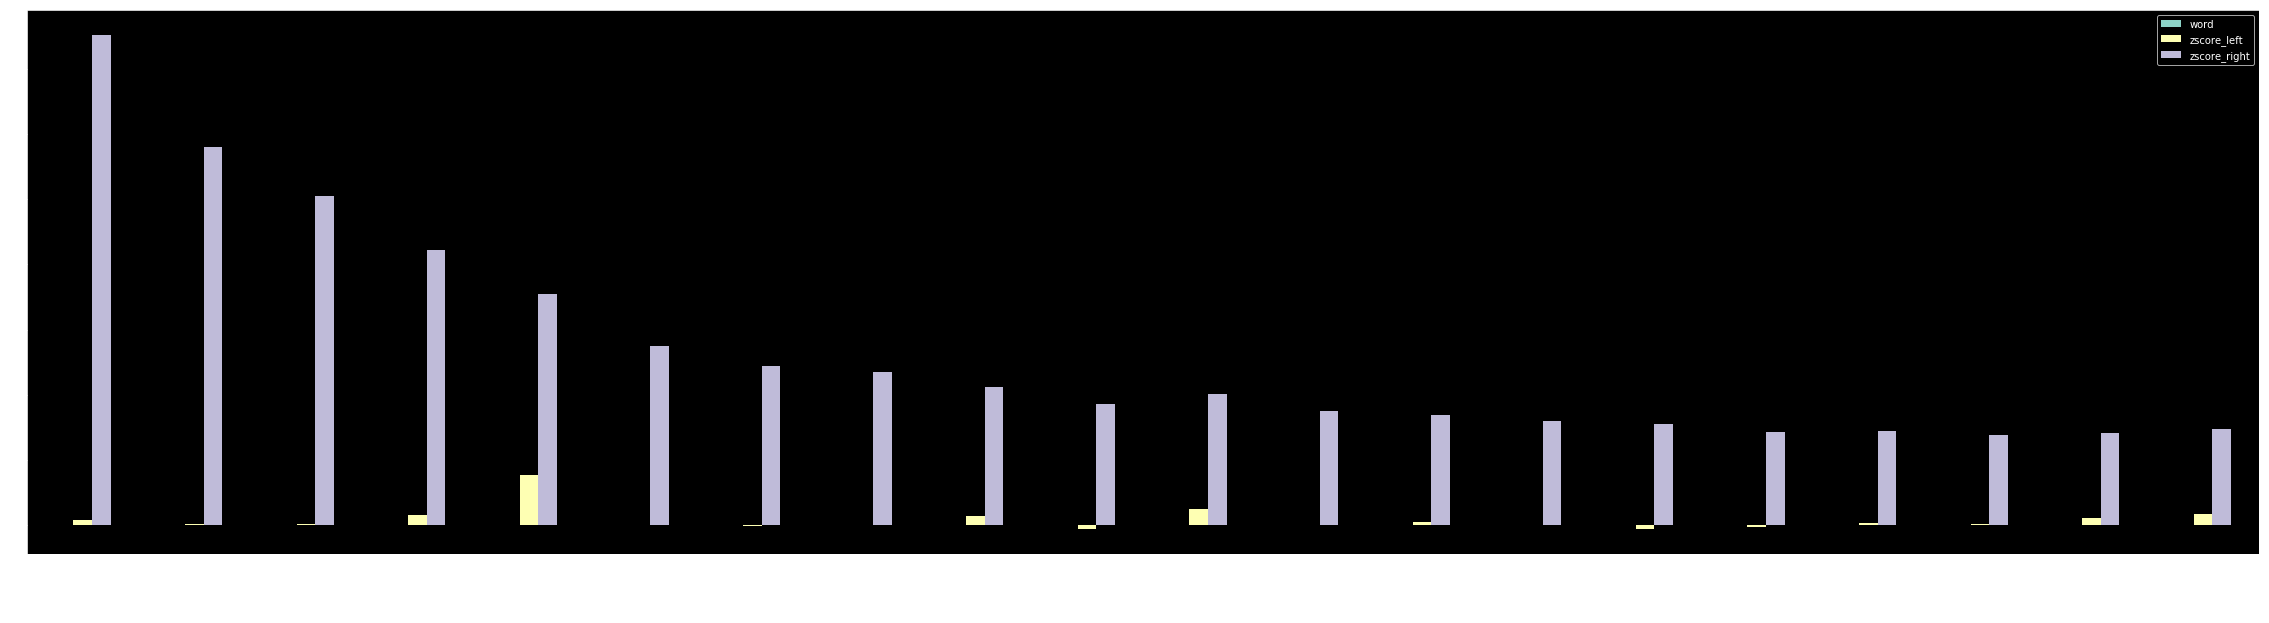

zscore_left : 2019-01-29, zscore_right : 2019-01-30


In [51]:

fontprop = fm.FontProperties(fname=path, size=33)

top20.loc[:,['word','zscore_left','zscore_right']].plot.bar(figsize=(40,10))
plt.xlabel(list(top20.index),fontproperties=fontprop)
plt.show()
print('zscore_left : 2019-01-29, zscore_right : 2019-01-30')



In [53]:
# 카이제곱검정
# 전제 : 사용된 언어의 빈도수에 따라 여론 변화가 있을 것이다.
# 귀무가설 : 어제 오늘 사용한 언어들에 차이가 없다
# 대립가설 : 어제 오늘 사용한 언어들에 차이가 있다

from scipy import stats 

# 카이제곱 검정을 위한 새로운 데이터프레임 생성
df = joined_df.iloc[:,[0,2]]
print(df.head())


      freq_left  freq_right
word                       
혜원         9149          57
사람         7585         780
생각         4078         561
조카         3541           2
아들         3294          65


In [54]:
# 카이제곱 결과
stats.chi2_contingency(df)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(df)

print("===Chi2 Stat===")
print(chi2_stat)
print("\n")

print("===Degrees of Freedom===")
print(dof)
print("\n")

print("===P-Value===")
print(p_val)
print("\n")

print("===Contingency Table===")
print(ex)


===Chi2 Stat===
136975.0457584712


===Degrees of Freedom===
4233


===P-Value===
0.0


===Contingency Table===
[[7.72508680e+03 1.48091320e+03]
 [7.01937335e+03 1.34562665e+03]
 [3.89275230e+03 7.46247703e+02]
 ...
 [1.00696330e+01 1.93036698e+00]
 [6.71308868e+00 1.28691132e+00]
 [3.35654434e+00 6.43455661e-01]]


In [55]:
# 결론
# p-value 가 0 이므로 어제,오늘 사용한 단어들의 유의미한 차이가 있다
# 설정한 전제에 따라 어제(2019.01.29)와 오늘(2019.01.30)의 여론은 달러졌을 것이다.
